# COVID-19 in Singapore

***

In [542]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
#warnings.filterwarnings("ignore")
sns.set()

## 1) Data Cleaning
1. Check if the data type for each column is correct.
1. Check if there are any missing values in each column and to fill accordingly.

In [543]:
#Import dataset
data = pd.read_csv("covid19_sg.csv")
data.describe()

,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,Cumulative Deaths,...,Linked community cases,Unlinked community cases,Cumulative Vaccine Doses,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO,Number taken booster shots
count,717.000000,608.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.00000,...,160.000000,160.000000,1.200000e+02,1.200000e+02,1.200000e+02,9.000000,9.000000,80.000000,80.000000,31.000000
mean,397.324965,0.131579,72850.330544,388.361227,0.008368,68140.847978,4232.864714,368.168759,1.168759,101.83682,...,30.450000,14.618750,8.295745e+06,4.392539e+06,3.879330e+06,118138.222222,78083.444444,180066.400000,92550.212500,478587.129032
std,823.667874,2.185573,68093.230057,828.428769,0.091158,64976.613983,7265.481629,557.974075,3.206701,207.90025,...,38.199707,26.721454,1.192874e+06,2.882246e+05,8.200380e+05,10618.138923,3019.922603,38125.334479,18985.378822,180971.682669
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,0.000000,0.00000,...,0.000000,0.000000,5.485548e+06,3.376297e+06,2.109251e+06,104061.000000,74121.000000,42623.000000,24130.000000,172090.000000
25%,13.000000,0.000000,48035.000000,12.000000,0.000000,44391.000000,103.000000,16.000000,0.000000,27.00000,...,2.000000,1.000000,7.485895e+06,4.297320e+06,3.310855e+06,108815.000000,75856.000000,162833.500000,85373.750000,331327.500000
50%,40.000000,0.000000,59059.000000,31.000000,0.000000,58793.000000,296.000000,108.000000,0.000000,29.00000,...,12.000000,3.500000,8.689759e+06,4.506378e+06,4.306486e+06,115970.000000,77095.000000,179602.000000,86772.000000,487673.000000
75%,339.000000,0.000000,62744.000000,313.000000,0.000000,62475.000000,4654.000000,474.000000,0.000000,36.00000,...,49.750000,17.000000,9.135696e+06,4.593508e+06,4.480897e+06,129787.000000,81555.000000,203645.750000,106014.750000,629889.000000
max,5324.000000,41.000000,284802.000000,5087.000000,1.000000,278455.000000,31166.000000,4229.000000,18.000000,837.00000,...,156.000000,185.000000,1.004902e+07,4.734669e+06,4.675888e+06,131497.000000,81709.000000,239146.000000,122126.000000,760408.000000


In [544]:
#Check dataframe data types
data.dtypes

Date                                                              object
Daily Confirmed                                                    int64
False Positives Found                                            float64
Cumulative Confirmed                                               int64
Daily Discharged                                                   int64
Passed but not due to COVID                                        int64
Cumulative Discharged                                              int64
Discharged to Isolation                                            int64
Still Hospitalised                                                 int64
Daily Deaths                                                       int64
Cumulative Deaths                                                  int64
Tested positive demise                                             int64
Daily Imported                                                     int64
Daily Local transmission                           

The *data* column should be a datetime object and all *float64* columns should be in *int64*. 

In [545]:
data["Date"] = pd.to_datetime(data["Date"])
float_columns = list(data.select_dtypes(include = ['float64']).columns)
# Since there are NaN values (type = float64) in the dataset, convert the NaN values to 0 first
for col in float_columns:
    data[col].fillna(0, inplace=True)
    data[col] = data[col].astype("int64")

In [546]:
#data.dtypes

In [547]:
data.head()

,Date,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,...,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Perc population completed at least one dose,Perc population completed vaccination,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO,Number taken booster shots,Perc population taken booster shots
0,2020-01-23,1,0,1,0,0,0,0,1,0,...,0,0,NaN,NaN,0,0,0,0,0,NaN
1,2020-01-24,2,0,3,0,0,0,0,3,0,...,0,0,NaN,NaN,0,0,0,0,0,NaN
2,2020-01-25,1,0,4,0,0,0,0,4,0,...,0,0,NaN,NaN,0,0,0,0,0,NaN
3,2020-01-26,0,0,4,0,0,0,0,4,0,...,0,0,NaN,NaN,0,0,0,0,0,NaN
4,2020-01-27,1,0,5,0,0,0,0,5,0,...,0,0,NaN,NaN,0,0,0,0,0,NaN


Check if there are missing dates in the dataframe. 

In [548]:
starting_date = data["Date"].sort_values()[0]
last_date = data["Date"].sort_values().iloc[-1]
print("Start Date:",starting_date, "\nEnd Date:", last_date)

Start Date: 2020-01-23 00:00:00 
End Date: 2022-01-08 00:00:00


In [549]:
data = data.set_index("Date")
print(pd.date_range(start = starting_date, end = last_date).difference(data.index))

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


Range of dates in dataset is from {{starting_date}} to {{last_date}}, and there are no missing values.

Next, check if there are any missing values in the *object* columns.

In [550]:
object_columns = list(data.select_dtypes(include = ['object']).columns)
data[object_columns].isnull().sum()

Phase                                           75
Perc population completed at least one dose    556
Perc population completed vaccination          556
Perc population taken booster shots            642
dtype: int64

There are missing values in the four *object* columns. In addition, the three percentage columns should be of *float64* type. 

In [551]:
data.Phase.unique()

array([nan, 'Circuit Breaker', 'Phase 1', 'Phase 2', 'Phase 3',
       'Phase 2 (Heightened Alert)', 'Phase 3 (Heightened Alert)',
       'Preparatory Stage', 'Stabilisation Phase', 'Transition Phase'],
      dtype=object)

In [552]:
data.reset_index(inplace=True)

In [553]:
start_end_dates = data.groupby(['Phase'],dropna=False)['Date'].agg(['min','max'])
start_end_dates

,min,max
Phase,,
Circuit Breaker,2020-04-07,2020-06-01
Phase 1,2020-06-02,2020-06-18
Phase 2,2020-06-19,2021-05-15
Phase 2 (Heightened Alert),2021-05-16,2021-08-09
Phase 3,2020-12-28,2021-05-07
Phase 3 (Heightened Alert),2021-06-14,2021-07-21
Preparatory Stage,2021-08-10,2021-09-25
Stabilisation Phase,2021-09-26,2021-11-21
Transition Phase,2021-11-22,2022-01-08


Null values for *Phase* column are found before 2020-04-06, hence rename those as *Pre-Circuit Breaker*.

In [554]:
data['Phase'] = data['Phase'].fillna("Pre-Circuit Breaker")

Next, duplicate the three percentage-based columns to percentage, and fill **NaN** values with 0. Retain the original columns to determine the start of the dosage data (if vaccinations had not start, value would be **NaN**).

In [555]:
percent_columns = ["Perc population completed at least one dose", "Perc population completed vaccination", "Perc population taken booster shots"]
#data[percent_columns]

In [556]:
for i in percent_columns:
    data[i + "_converted"] = data[i].str.rstrip("%").astype('float')/100.0
    data[i + "_converted"] = data[i + "_converted"].fillna(0)
data["Perc population completed at least one dose_converted"].describe

<bound method NDFrame.describe of 0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
712    0.88
713    0.88
714    0.88
715    0.89
716    0.89
Name: Perc population completed at least one dose_converted, Length: 717, dtype: float64>

In [557]:
data = data.set_index(['Date'])

Do a final check on the dataset before proceeding to next stage.

In [558]:
data.describe()

,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,Cumulative Deaths,...,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO,Number taken booster shots,Perc population completed at least one dose_converted,Perc population completed vaccination_converted,Perc population taken booster shots_converted
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.00000,...,7.170000e+02,7.170000e+02,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,397.324965,0.111576,72850.330544,388.361227,0.008368,68140.847978,4232.864714,368.168759,1.168759,101.83682,...,7.351530e+05,6.492603e+05,1482.906555,980.126918,20091.090656,10326.383543,20692.051604,0.190349,0.184812,0.028271
std,823.667874,2.012903,68093.230057,828.428769,0.091158,64976.613983,7265.481629,557.974075,3.206701,207.90025,...,1.645084e+06,1.487229e+06,13209.476000,8705.083675,58128.685894,29833.376933,104212.569500,0.354181,0.344613,0.087543
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,0.000000,0.00000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,48035.000000,12.000000,0.000000,44391.000000,103.000000,16.000000,0.000000,27.00000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,0.000000,59059.000000,31.000000,0.000000,58793.000000,296.000000,108.000000,0.000000,29.00000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,339.000000,0.000000,62744.000000,313.000000,0.000000,62475.000000,4654.000000,474.000000,0.000000,36.00000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5324.000000,41.000000,284802.000000,5087.000000,1.000000,278455.000000,31166.000000,4229.000000,18.000000,837.00000,...,4.734669e+06,4.675888e+06,131497.000000,81709.000000,239146.000000,122126.000000,760408.000000,0.890000,0.870000,0.450000


In [559]:
data.columns

Index(['Daily Confirmed', 'False Positives Found', 'Cumulative Confirmed',
       'Daily Discharged', 'Passed but not due to COVID',
       'Cumulative Discharged', 'Discharged to Isolation',
       'Still Hospitalised', 'Daily Deaths', 'Cumulative Deaths',
       'Tested positive demise', 'Daily Imported', 'Daily Local transmission',
       'Local cases residing in dorms MOH report',
       'Local cases not residing in doms MOH report',
       'Intensive Care Unit (ICU)', 'General Wards MOH report',
       'In Isolation MOH report', 'Total Completed Isolation MOH report',
       'Total Hospital Discharged MOH report',
       'Requires Oxygen Supplementation or Unstable', 'Linked community cases',
       'Unlinked community cases', 'Phase', 'Cumulative Vaccine Doses',
       'Cumulative Individuals Vaccinated',
       'Cumulative Individuals Vaccination Completed',
       'Perc population completed at least one dose',
       'Perc population completed vaccination', 'Sinovac vaccine dos

## 1) Data Visualisation
1. Case Count per day by Phases
1. Vaccination % over time
1. Decompose Trend

In [560]:
#Create monthly labels to plot monthly data
data['Week-Year'] = data.index.strftime("%Y-%W")
weekly_confirmed = data.groupby("Week-Year")["Daily Confirmed"].agg(Total_Confirmed = ('mean'))
weekly_confirmed["Date"] = weekly_confirmed.index
month_year = data.index.strftime("%m-%Y")
weekly_confirmed

,Total_Confirmed,Date
Week-Year,,
2020-03,1.000000,2020-03
2020-04,2.000000,2020-04
2020-05,3.571429,2020-05
2020-06,4.571429,2020-06
2020-07,2.000000,2020-07
...,...,...
2021-50,364.000000,2021-50
2021-51,264.857143,2021-51
2021-52,328.200000,2021-52


In [561]:
data.reset_index(inplace=True)
phase_shades = data.groupby("Phase")['Date'].agg(min_date = ("min"), max_date = ("max"))

In [562]:
phase_shades

,min_date,max_date
Phase,,
Circuit Breaker,2020-04-07,2020-06-01
Phase 1,2020-06-02,2020-06-18
Phase 2,2020-06-19,2021-05-15
Phase 2 (Heightened Alert),2021-05-16,2021-08-09
Phase 3,2020-12-28,2021-05-07
Phase 3 (Heightened Alert),2021-06-14,2021-07-21
Pre-Circuit Breaker,2020-01-23,2020-04-06
Preparatory Stage,2021-08-10,2021-09-25
Stabilisation Phase,2021-09-26,2021-11-21


In [563]:
#Compute % of daily local transmission
data["Perc Daily Local Transmission"] = data["Daily Local transmission"]/data["Daily Confirmed"]*100
data["Perc Daily Local Transmission"].fillna(0,inplace=True)

In [582]:
# Define function to plot graphs
def plot_graph(locationx,locationy, data, x, y, label, color, weekly = 0):
    '''
    #Note:
    #   Subplot function must be called first to define the plot area
    
    #Parameters:
    
    #   locationx (int) - row position in subplot
    #   locationy (int) - column position in subplot
    #   data (dataframe) - dataset where x and y variables are from
    #   x (str) - x-axis column name
    #   y (str) - y-axis column name
    #   label (str) - Label in plotted graph
    #   color (str) - Color of plotted graph
    #   weekly (boolean) - If this param is set to 0, the x-ticks for weekly plot will be too dense,
                           setting this param to 1 will change the x-axis ticks for the weekly plot 
    
    #Returns:
    #   A subplot
    '''
    ax = sns.lineplot(ax=axs[locationx,locationy],data=data,x=x,y=y,label=label,color=color)
    plt.xticks(rotation=40,horizontalalignment="right",fontweight="light",size=12)
    if weekly: ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    axs[locationx,locationy].set_title(label)
    plt.show

In [580]:
# Create list of parameters for graphs to be plotted
graph_params = [
    {
        "locationx":0,
        "locationy":0,
        "data":data,
        "x":"Date",
        "y":"Daily Confirmed",
        "label":"Daily Confirmed Cases",
        "color":"indianred",
        "weekly":0
    },
    {
        "locationx":1,
        "locationy":0,
        "data":data,
        "x":"Date",
        "y":"Perc Daily Local Transmission",
        "label":"% Of Daily Local Transmission",
        "color":"tomato",
        "weekly":0
    },
    {
        "locationx":1,
        "locationy":1,
        "data":data,
        "x":"Date",
        "y":"Perc population completed vaccination_converted",
        "label":"% Of Population Completed Vaccination",
        "color":"green",
        "weekly":0
    },
    {
        "locationx":0,
        "locationy":1,
        "data":weekly_confirmed,
        "x":"Date",
        "y":"Total_Confirmed",
        "label":"Daily Confirmed Cases (Weekly Average)",
        "color":"orangered",
        "weekly":1
    },
]

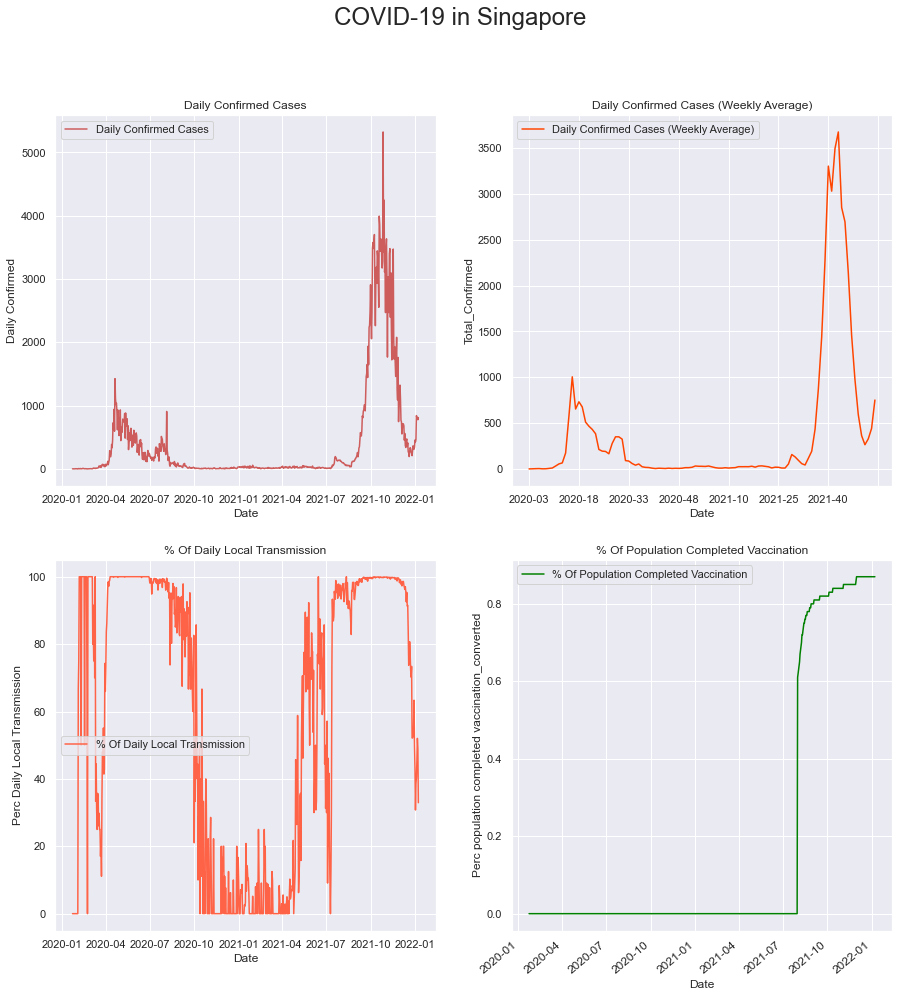

In [583]:
fig, axs=plt.subplots(2,2,figsize=(15,15))
#plt.setp(axs,xticks=np.arange(0, 717, step=31),xticklabels=month_year)
fig.suptitle("COVID-19 in Singapore", size=24)

for graph in graph_params:
    plot_graph(locationx=graph["locationx"],locationy=graph["locationy"],data=graph["data"],x=graph["x"],y=graph["y"],label=graph["label"],color=graph["color"], weekly=graph["weekly"])